# Comparision of a Fully Connected Network and a Convolutional Neural Network on the MNIST data

In this notebook, we will comparing the performance of

1) a fully connected network

and

2) LeNet-5 convolutional network

by training and testing on the MNIST dataset.

We will load the dataset using tensorflow_datasets.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## About the dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. It has a collection of 70000 gray-scaled images of handwritten digits along with their labels. The images are splitted into 2 groups, the train group consists of 60000 images while the test group consists of 10000 images. Each image contains 28x28 pixels. Each pixel has an integer value ranging from 0 to 255, 0 denoting black and 255 denoting white.

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Let's plot and see the first 20 images from both the train and test data.

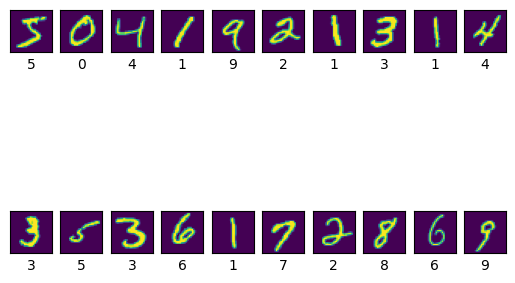

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(20):
  plt.subplot(2,10,1+i)
  plt.imshow(train_images[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(train_labels[i])
plt.show()

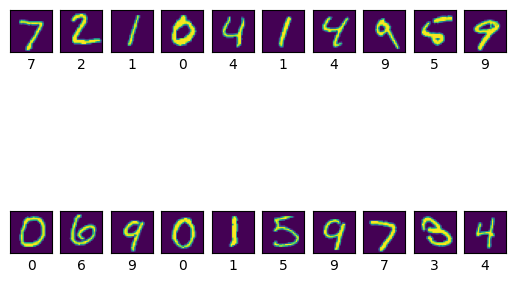

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(20):
  plt.subplot(2,10,1+i)
  plt.imshow(test_images[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(test_labels[i])
plt.show()

Normalizing the images

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Tensorflow

We will be implementing our models using tensorflow and keras.

### Model 1 : Fully connected Network

Our first model will be the fully connected network.
Since the images are of size 28 x 28, we will flatten them first to make them a (784,1) column array. Then we will add in 3 fully connected layers, the first layer will have 128 neurons, the second layer with 64 and the third layer will have 10 neurons equal to the number of classes in our dataset.

We will be using ReLU activation function in the hidden layers, adam optimizer and categorical cross-entropy loss function.
Training will be done for 10 iterations, also called epochs.

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2142 - sparse_categorical_accuracy: 0.9355
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0930 - sparse_categorical_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0648 - sparse_categorical_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0511 - sparse_categorical_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0295 - sparse_categorical_accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9921
Epoch 9/10
1875/1875 [==

In [ ]:
model1.evaluate(x=test_images,y=test_labels,batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.1176 - sparse_categorical_accuracy: 0.9727


[0.11755272001028061, 0.9726999998092651]

On training for 10 epochs, we got an accuracy of 99.36% on the training dataset and an accuracy of only 97.27% on the test dataset.

Let's check the predictions of the model.

In [ ]:
y_pred1= model1.predict(test_images)
for i in range(5):
  print("{} {}".format(y_pred1[i],test_labels[i]))

313/313 [==============================] - 1s 3ms/step
[ -7.997721     0.1717231    0.72496647  -1.7440064   -2.5032797
  -7.340473   -18.562574    21.061932    -6.438997     2.4615948 ] 7
[-11.569049     0.21860114  17.672243     2.5597456  -10.102468
 -10.717724    -8.530971     1.1692382   -8.697997   -16.743364  ] 2
[ -7.7535906  15.629853   -1.2104903 -11.370921   -1.7420694  -3.8103025
  -1.5093687  -2.7636855  -0.8957143  -5.7357883] 1
[ 13.664569   -7.1322227  -2.2316396  -4.1466613  -1.7681049  -6.775597
   0.9621814  -4.7109876 -12.467371   -5.203817 ] 0
[ -8.179651    2.2348723 -14.197958  -15.553159   15.613654  -10.719717
  -5.1436887   2.9272535  -6.6114726   3.5458345] 4


In [ ]:
import numpy as np
pred1=[]
for i in range(len(y_pred1)):
  pred1.append(np.argmax(y_pred1[i]))

for i in range(20):
  print("{} {}".format(pred1[i],test_labels[i]))

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4


### Model 2 : Convolutional Neural Network

In our second model, we will be implementing the LeNet-5 architecture. A convolutional layer with 6 feature maps, each with kernel size 5x5. Each output feature map will have 24x24 matrix. Then we will do a max pooling with kernel size 2x2. Each output feature map will have 12x12 matrix.

Then we will add another convolutional layer with 16 feature maps each with kernel size 3x3. Now, the output contains 16 feature maps each having 10x10 matrix. Again a max pooling with kernel size 2x2 to obtain 16 output feature maps each having 5x5 matrix.

Finally, for the predictions, we will flatten the outputs and then add 3 fully connected layers, the first layer will have 120 neurons, the second layer will have 84 neurons, the third will have 10 neurons equal to the number of classes in our dataset.

We will be using ReLU activation function in the hidden layers and convolutional layers, adam optimizer and categorical cross-entropy loss function.
Training will be done for 10 epochs.

In [ ]:
model2 = models.Sequential(
    [
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10),
    ]
)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [ ]:
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1842 - accuracy: 0.9440
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0611 - accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0442 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0355 - accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0288 - accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0151 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 35s 19m

In [ ]:
model2.evaluate(x=test_images,y=test_labels,batch_size=32)

313/313 [==============================] - 2s 6ms/step - loss: 0.0396 - accuracy: 0.9894


[0.039578378200531006, 0.9894000291824341]

On training for 10 epochs, we got an accuracy of 99.52% on the training dataset and an accuracy of 98.94% on the test dataset.

Let's check the predictions of the model.

In [ ]:
y_pred2= model2.predict(test_images)
for i in range(5):
  print("{} {}".format(y_pred2[i],test_labels[i]))

313/313 [==============================] - 2s 7ms/step
[-16.32456    -1.8739544  -3.680388   -5.3878436   1.0337102  -6.313058
 -20.020454   16.587341  -14.462039   -0.782584 ] 7
[  0.9382248  -5.4496837  18.04964    -7.172645   -8.711168  -11.77319
   0.8802656  -5.2288     -4.560094  -14.760231 ] 2
[ -2.0216842   17.927856    -6.1351867  -25.393131    -4.6291037
  -6.676921    -2.7604923   -3.6538022   -0.35551465  -8.354355  ] 1
[ 18.250975   -10.947657    -7.691384   -11.099515   -10.737192
  -5.2146115    0.27719107  -6.7641892   -3.6151972   -0.33057177] 0
[ -8.714283    -7.6514564   -6.780565   -19.989408    14.763235
 -15.199741    -0.96298575  -2.2632077   -3.8414972    6.5937543 ] 4


In [ ]:
import numpy as np
pred2=[]
for i in range(len(y_pred2)):
  pred2.append(np.argmax(y_pred2[i]))

for i in range(20):
  print("{} {} {}".format(pred1[i],pred2[i],test_labels[i]))

7 7 7
2 2 2
1 1 1
0 0 0
4 4 4
1 1 1
4 4 4
9 9 9
5 5 5
9 9 9
0 0 0
6 6 6
9 9 9
0 0 0
1 1 1
5 5 5
9 9 9
7 7 7
3 8 3
4 4 4


# Conclusion :
The LeNet architecture had only 44,426 parameters, while the Fully Connected network had 242,762 parameters. But it still gave around 99% accuracy while the latter gave only 97%. Around 170 more images were correctly classified. This shows the effectiveness of CNN based architecture.